## Open EMG Data corresponding to partners movements

This code show how to open the database of Emg signals and pattners moviments, disposable in extension " .m " in "EMG_patterns_datalog" path.

More details about record of signals, type of movements, used protocol, used electromyography and experimental setup are presented in "EMG_patterns_datalog" folder

### Import libraries

In [9]:
# Open libraries 
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt 
import scipy.optimize as opt
import scipy.io
import seaborn as ns;


### Read the datalog that is in " .m " file 


In [10]:
mat = scipy.io.loadmat('EMG_patterns_datalog/recording_mov_v2.mat')     

### Define emg data

In [11]:
emg = mat['emg'];

### Define pattern moviments


In [12]:
n_movements=8 # number of registered moviments
stimulus= mat['stimulus'];
stimulus=stimulus[stimulus<n_movements]

### datalog recording time 


In [13]:
Ts=0.005
nit=len(stimulus)
t  =np.linspace(1, Ts*nit-Ts, nit)

### Define th Signal EMG with the imput signal 


In [14]:
### define th Signal EMG with the imput signal 
u1=emg[:nit,0];
u2=emg[:nit,1];
u3=emg[:nit,2];
u4=emg[:nit,3];
u5=emg[:nit,4];
u6=emg[:nit,5];
u7=emg[:nit,6];
u8=emg[:nit,7];
U=[u1,u2,u3,u4,u5,u6,u7,u8]

### Define the labels of pattern moviments


In [15]:
y=stimulus

### plot the EMG and Force  signals    


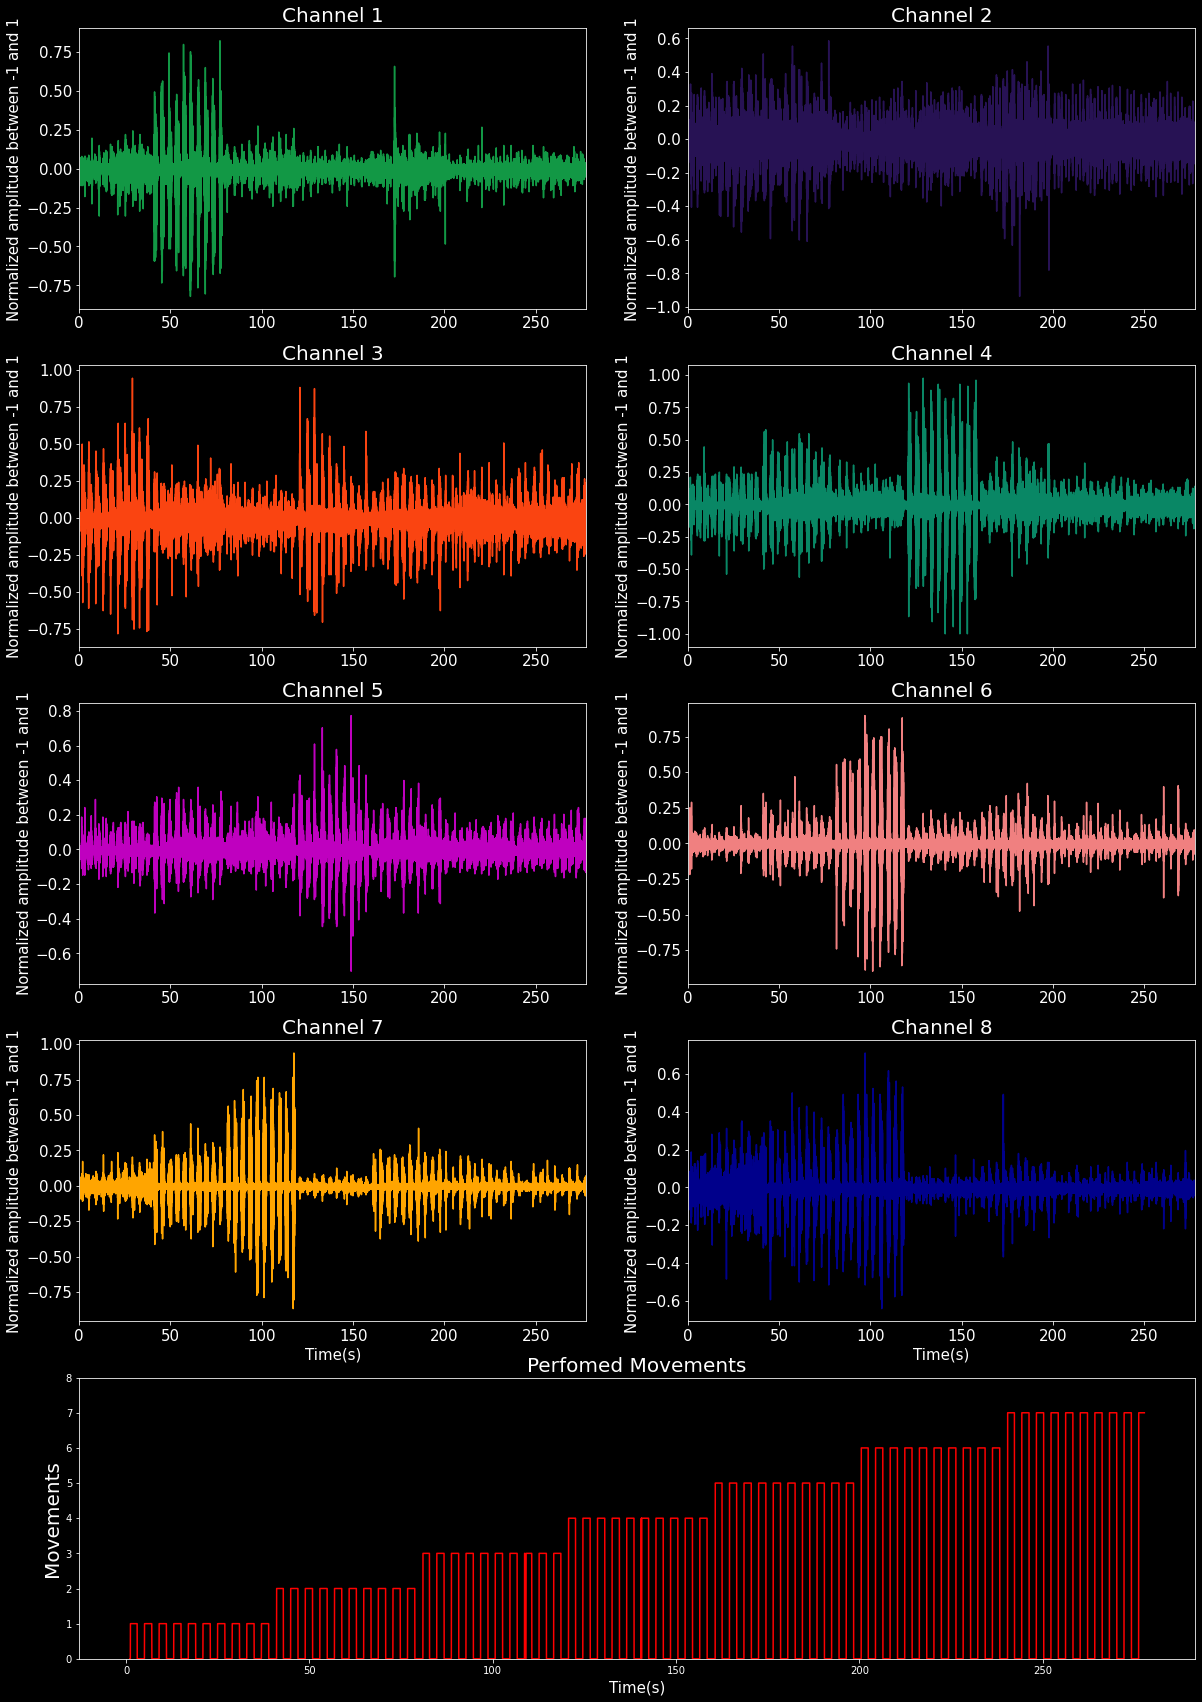

In [17]:
axs={}
plt.style.use('dark_background')
fig = plt.figure( figsize=(20, 30))
#fig.suptitle('Datalog')
colour_palete= ['#129845', '#271254', '#FA4411', '#098765', 'm', 'lightcoral', 'orange', 'darkblue' ]

for channel,colour in enumerate(colour_palete):

    axs[channel]=fig.add_subplot(5, 2, (channel+1))
    axs[channel].set_title('Channel '+str(channel+1), fontsize=20)
    axs[channel].plot(t, U[channel], colour)
    axs[channel].set_ylabel('Normalized amplitude between -1 and 1', fontsize=15)
    #axs[channel].set_xlabel('Tempo(s)', fontsize=15)
    axs[channel].set_xlim([0,t[-1]])
    axs[channel].tick_params(axis='x', labelsize=15)
    axs[channel].tick_params(axis='y', labelsize=15)
axs[6].set_xlabel('Time(s)', fontsize=15)
axs[7].set_xlabel('Time(s)', fontsize=15)

axs[8]=fig.add_subplot(5, 1, 5)
axs[8].plot(t, y, 'red')
axs[8].set_title('Perfomed Movements', fontsize=20)
axs[8].set_ylabel('Movements', fontsize=20)
axs[8].set_ylim([0,8])
axs[8].set_xlabel('Time(s)', fontsize=15)

plt.savefig('EMG_patterns_datalog/datalog_fig.png')
plt.show()